# WeatherPy

---

### Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [9]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [16]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1


# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + city + "&appid=" + weather_api_key + "&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | dryden
Processing Record 3 of Set 1 | strehaia
Processing Record 4 of Set 1 | nieuw amsterdam
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | happy valley-goose bay
Processing Record 7 of Set 1 | mezhdurechenskiy
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | kudahuvadhoo
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | flying fish cove
Processing Record 14 of Set 1 | cargados carajos
City not found. Skipping...
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | sohbatpur
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | dogondoutchi
Processing Record 20 of Set 1 | mount pearl
Processing Record 21 o

In [17]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [18]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,44.06,88,97,24.25,TF,1684803190
1,dryden,49.7833,-92.7503,70.09,46,0,5.75,CA,1684803191
2,strehaia,44.6167,23.2000,58.15,91,99,3.71,RO,1684803191
3,nieuw amsterdam,5.8833,-55.0833,79.02,89,40,0.00,SR,1684803192
4,grytviken,-54.2811,-36.5092,40.96,97,100,10.33,GS,1684803192


In [19]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [2]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,44.06,88,97,24.25,TF,1684803190
1,dryden,49.7833,-92.7503,70.09,46,0,5.75,CA,1684803191
2,strehaia,44.6167,23.2000,58.15,91,99,3.71,RO,1684803191
3,nieuw amsterdam,5.8833,-55.0833,79.02,89,40,0.00,SR,1684803192
4,grytviken,-54.2811,-36.5092,40.96,97,100,10.33,GS,1684803192


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

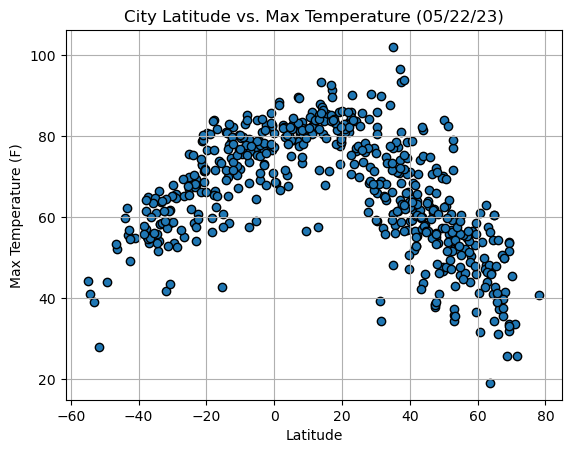

In [3]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"],edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

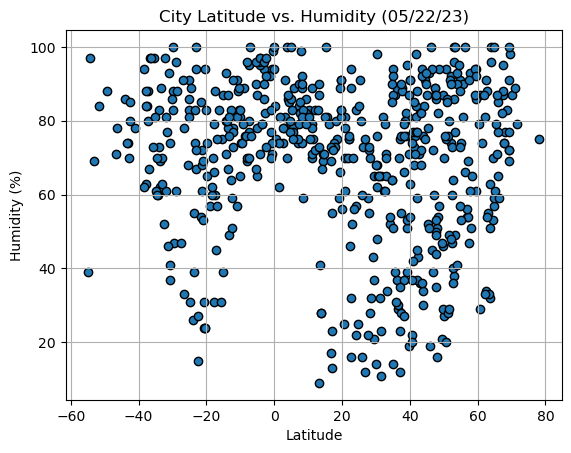

In [4]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"],edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

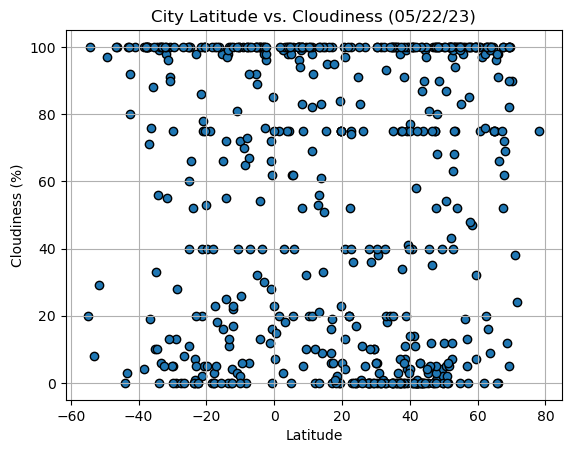

In [5]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"],edgecolors="black")


# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

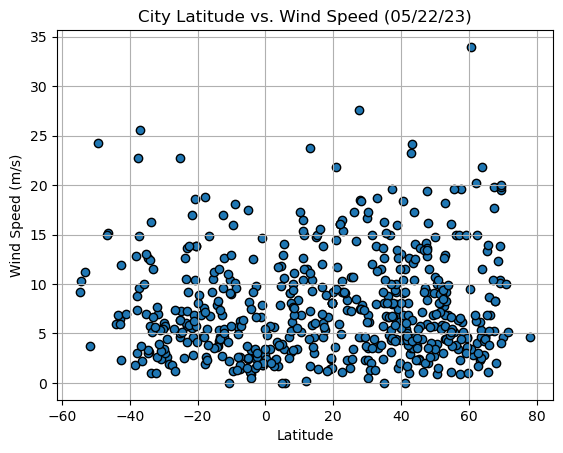

In [6]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"],edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [31]:
# Define a function to create Linear Regression plots
def linear_regression(x_values,y_values,y_axis):
    
    # Linear Regression modeling
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plotting the Data
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.text(x_values.min(), y_values.max(), line_eq, fontsize=12, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_axis)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [8]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,dryden,49.7833,-92.7503,70.09,46,0,5.75,CA,1684803191
2,strehaia,44.6167,23.2000,58.15,91,99,3.71,RO,1684803191
3,nieuw amsterdam,5.8833,-55.0833,79.02,89,40,0.00,SR,1684803192
5,happy valley-goose bay,53.3168,-60.3315,43.11,49,75,9.22,CA,1684803193
6,mezhdurechenskiy,59.6000,65.9333,58.53,61,7,4.65,RU,1684803193


In [9]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,44.06,88,97,24.25,TF,1684803190
4,grytviken,-54.2811,-36.5092,40.96,97,100,10.33,GS,1684803192
7,puerto natales,-51.7236,-72.4875,28.06,84,29,3.76,CL,1684803193
10,blackmans bay,-43.0167,147.3167,55.72,74,100,6.42,AU,1684803196
11,adamstown,-25.0660,-130.1015,75.76,86,100,22.70,PN,1684803197


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.7817887919952825


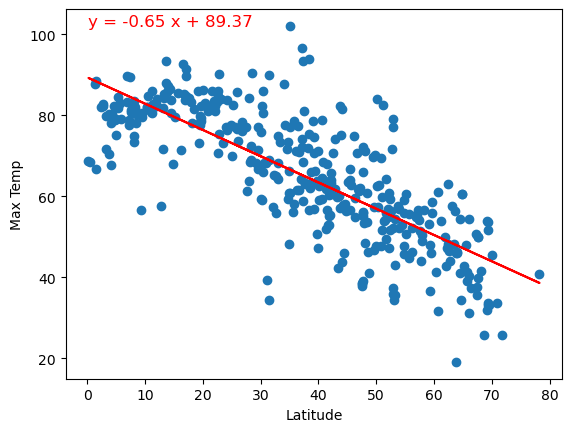

In [32]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
linear_regression(x_values,y_values,"Max Temp")

The r-squared is: 0.774405124413237


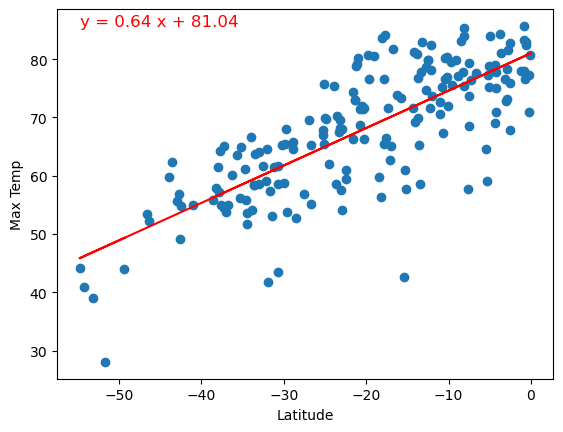

In [33]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
linear_regression(x_values,y_values,"Max Temp")

**Discussion about the linear relationship:** 

There are clear linear relationship between temperature and latitude. On Norhern hemisphere it showed negative linear relation while on Southern hemishphere shows opposite. There are some outliers but most of the data is alligned to the line and based on coefficient of dertermination which provides information about the goodness of fit of a model is high we could conclude the regression it is accurate in statistical measure.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: -0.01906266715061907


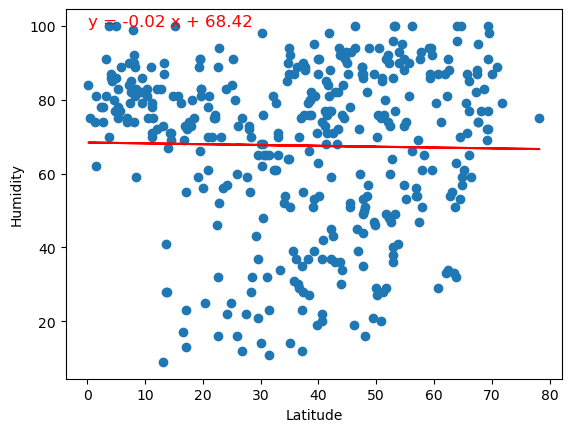

In [34]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
linear_regression(x_values,y_values,"Humidity")

The r-squared is: 0.147582979122876


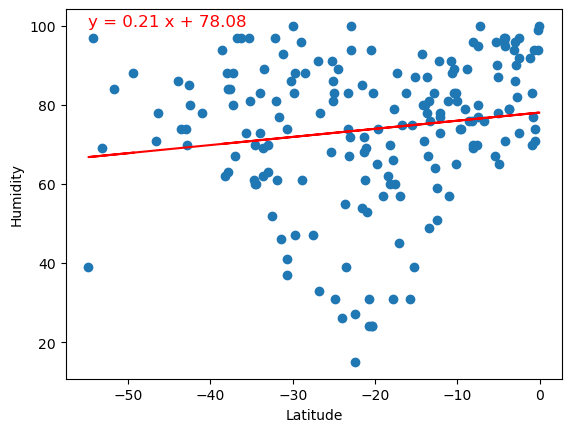

In [35]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
linear_regression(x_values,y_values,"Humidity")

**Discussion about the linear relationship:**

The codfficient of determination is considered good when its absolute value is between 0.50 to 0.99. It is then acceptable in social science research especially when most of the explanatory variables are statistically significant. Therefore we could conclude there are weak linear relation between humidity and latitude. Also, the scatter plot shows a wide distribution of data points across the plot, indicating a lack of evident linear alignment.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.09252250400421698


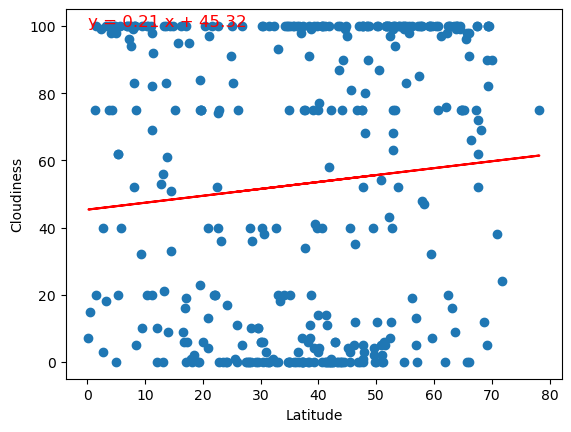

In [36]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
linear_regression(x_values,y_values,"Cloudiness")

The r-squared is: -0.014832932255187302


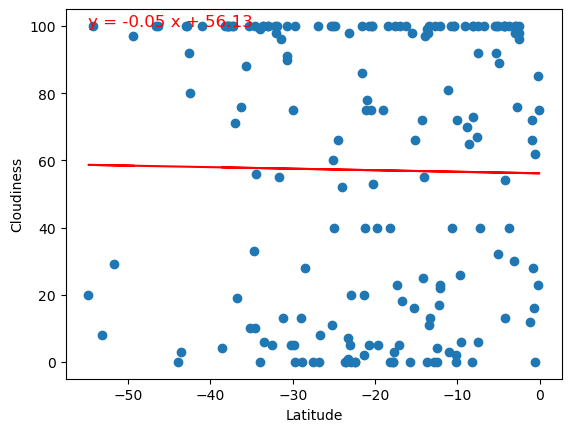

In [37]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
linear_regression(x_values,y_values,"Cloudiness")

**Discussion about the linear relationship:** 

The relationship between cloudiness and latitude had more weak linear relation than the humidity. Further investigation may be necessary to uncover additional factors that could potentially influence the observed relationship. It is important to consider other variables or factors that might contribute to clodiness and explore alternative models beyond a simple linear relatinoship.


### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.05104625400522887


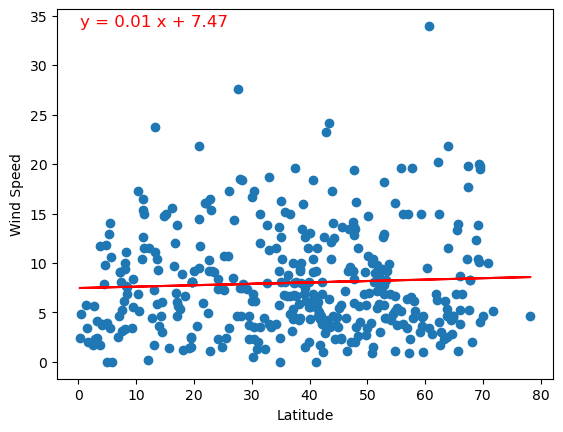

In [38]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
linear_regression(x_values,y_values,"Wind Speed")

The r-squared is: -0.22228458131525416


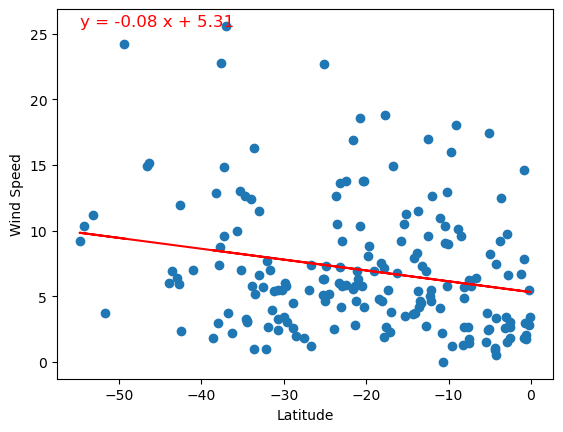

In [39]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
linear_regression(x_values,y_values,"Wind Speed")

**Discussion about the linear relationship:** 

It looks there is some overall trend in the data, the scattered nature of the poinst suggests a weak correaltion between wind speed and latitude. Also based on the coefficient of determination value the relationship between variables are not linear.